# Exploring Classification Models: A Comparative Study on a Simple Dataset
In this notebook, I explore and compare the performance of K-Nearest Neighbors (KNN), Naive Bayes, Logistic Regression, Support Vector Machines (SVM) and Neural Networks on the Heart Attack Analysis & Prediction Dataset. The goal is to understand how each model performs in predicting heart attack risk based on the dataset's features.

Source: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

In [2]:
df_full = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df_full.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Visualize Features

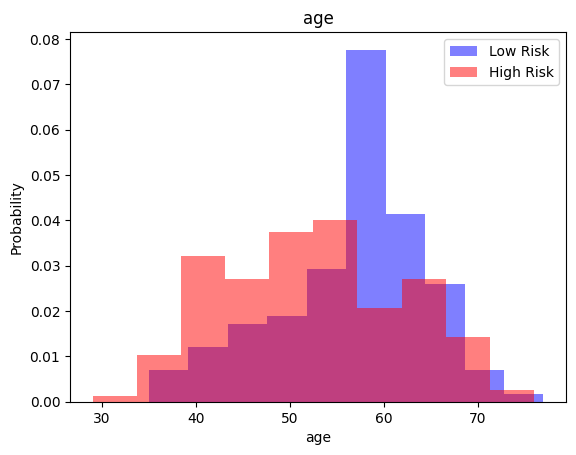

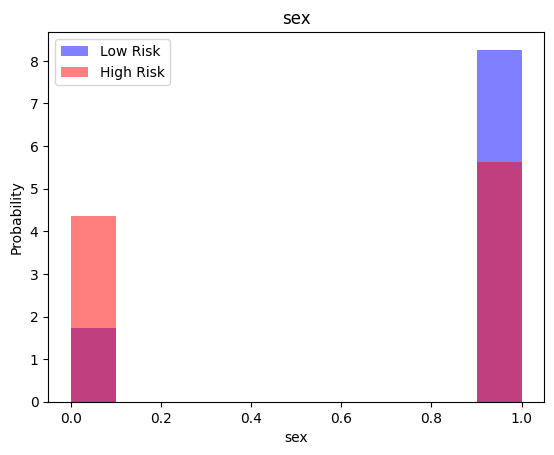

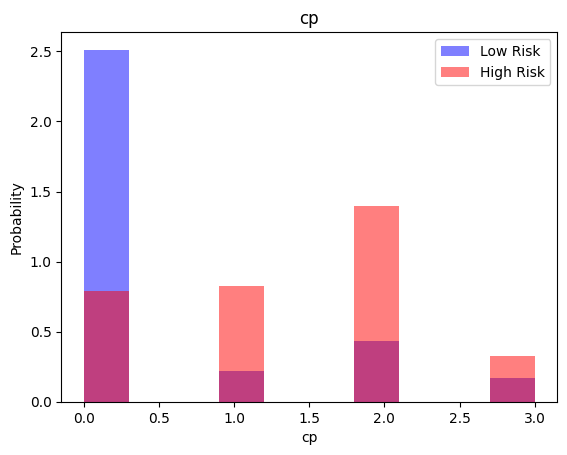

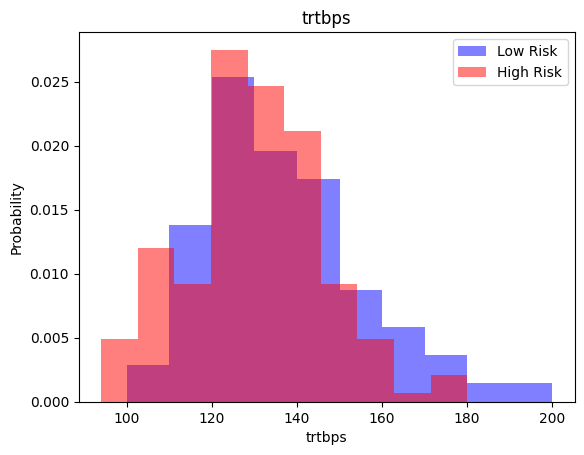

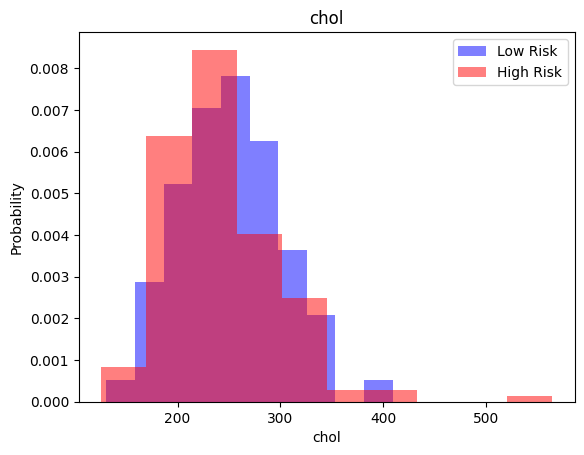

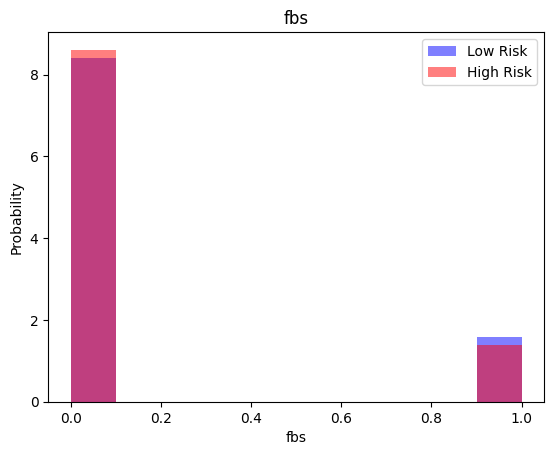

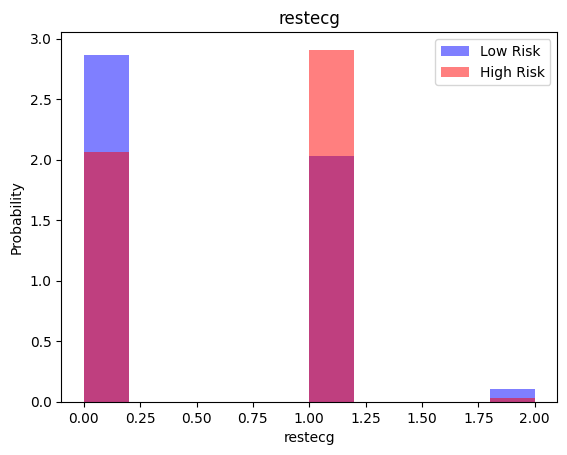

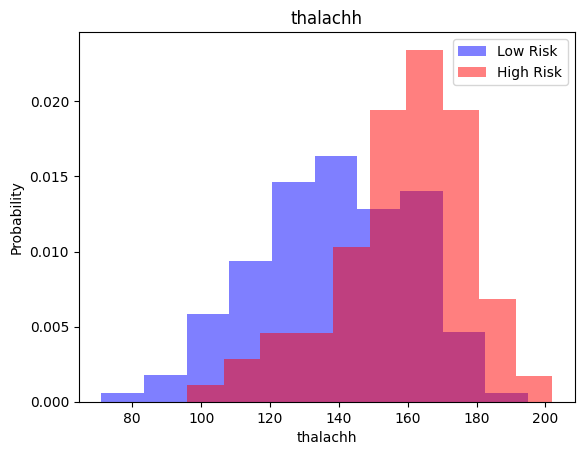

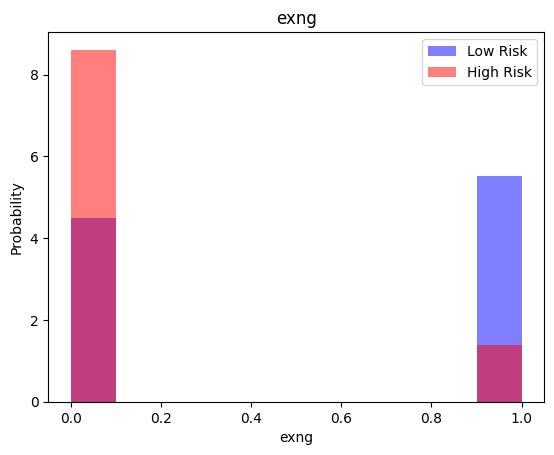

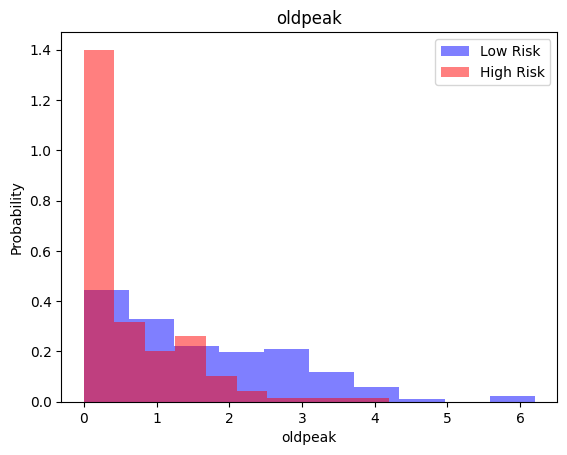

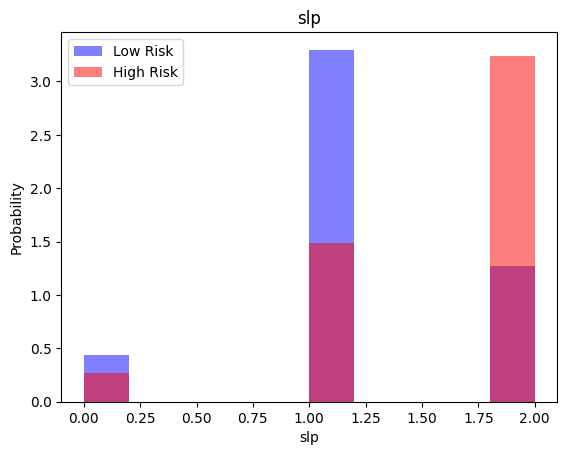

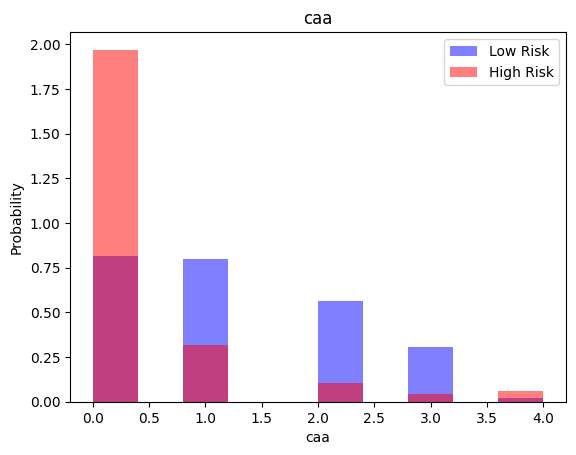

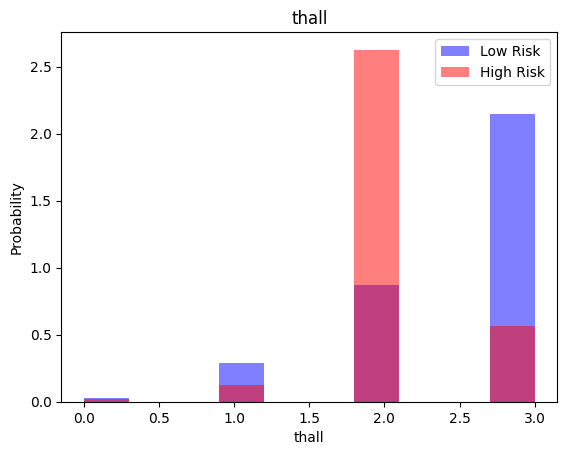

In [3]:
# Create a histogram for each feature that visualizes the trend of low risk vs high risk people
for feature in df_full.columns[:-1]:
    plt.hist(df_full[df_full["output"]==0][feature], color="blue", label="Low Risk", alpha=0.5, density=True)
    plt.hist(df_full[df_full["output"]==1][feature], color="red", label="High Risk", alpha=0.5, density=True)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

# Preprocess Data

In [4]:
# Drop features that do not contribute to predicting the class
df = df_full.drop("fbs", axis=1)

In [5]:
# There are a similar number of entries for either classification, so no scaler is necessary
print(f"THere are {df[df['output']==1].shape[0]} entries for output 1")
print(f"There are {df[df['output']==0].shape[0]} entries for output 0")

THere are 165 entries for output 1
There are 138 entries for output 0


In [6]:
# Split data into train, validatian, and test datasets
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

def split_data_Xy(df):
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    
    # reshape: all the input arrays must have same number of dimensions, but y currently only has 1 dimension
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
data, X_train, y_train = split_data_Xy(train)
data, X_valid, y_valid = split_data_Xy(valid)
data, X_test, y_test = split_data_Xy(test)

# K Nearest Neighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [9]:
KNN_preds = KNN_model.predict(X_test)

In [10]:
print(classification_report(y_test, KNN_preds))
MAE_KNN = mean_absolute_error(y_test, KNN_preds)
print(f"Mean absolute error: {round(MAE_KNN, 5)}")

              precision    recall  f1-score   support

           0       0.50      0.53      0.52        30
           1       0.52      0.48      0.50        31

    accuracy                           0.51        61
   macro avg       0.51      0.51      0.51        61
weighted avg       0.51      0.51      0.51        61

Mean absolute error: 0.4918


# Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)

GaussianNB()

In [12]:
bayes_preds = bayes_model.predict(X_test)

In [13]:
print(classification_report(y_test, bayes_preds))
MAE_bayes = mean_absolute_error(y_test, bayes_preds)
print(f"Mean absolute error: {round(MAE_bayes, 5)}")

              precision    recall  f1-score   support

           0       0.76      0.63      0.69        30
           1       0.69      0.81      0.75        31

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61

Mean absolute error: 0.27869


# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=800)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=800)

In [15]:
log_reg_preds = log_reg_model.predict(X_test)

In [16]:
print(classification_report(y_test, log_reg_preds))
MAE_log_reg = mean_absolute_error(y_test, log_reg_preds)
print(f"Mean absolute error: {round(MAE_log_reg, 5)}")

              precision    recall  f1-score   support

           0       0.74      0.57      0.64        30
           1       0.66      0.81      0.72        31

    accuracy                           0.69        61
   macro avg       0.70      0.69      0.68        61
weighted avg       0.70      0.69      0.68        61

Mean absolute error: 0.31148


# Support Vector Machines (C-Support Vector Classification)

In [17]:
from sklearn.svm import SVC

def train_SVC(X_train, y_train, X_test, kernel):
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    svm_preds = svm_model.predict(X_test)
    MAE_SVM = mean_absolute_error(y_test, svm_preds)
    return MAE_SVM, svm_preds

In [18]:
# Test to find the most accurate kernal
lowest_MAE_SVM = float('inf')
best_kernel = None
best_SVM_preds = None

for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    MAE_SVM, SVM_preds = train_SVC(X_train, y_train, X_test, kernel)
    if MAE_SVM < lowest_MAE_SVM:
        lowest_MAE_SVM = MAE_SVM
        best_kernel = kernel
        best_SVM_preds = SVM_preds
    print(f"MAE of {kernel} kernel: {round(MAE_SVM, 5)}")    

print(f"\nBest performing kernal is {best_kernel} with a MAE of {round(lowest_MAE_SVM, 5)}")

MAE of linear kernel: 0.32787
MAE of poly kernel: 0.44262
MAE of rbf kernel: 0.44262
MAE of sigmoid kernel: 0.4918

Best performing kernal is linear with a MAE of 0.32787


# Neural Networks

In [19]:
def plot_history(history):
    my_plot, (ax1, ax2) = plt.subplots(1,2, figsize=(7,3))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
        
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    plt.show()

In [20]:
import tensorflow as tf

# train neural network model
def train_nn_model(X_train, y_train, num_nodes, dropout_prob, lr=0.001, batch_size=32, epochs=100):
    nn_model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])
    
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), verbose=0
    )
    
    return nn_model, history

16 nodes, 0 dropout prob, 0.001 learning rate, 32 batch size


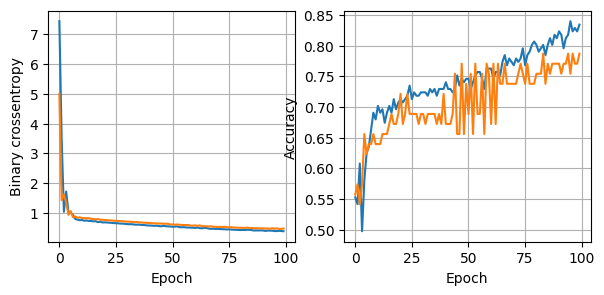

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7954 - loss: 0.4460 
16 nodes, 0 dropout prob, 0.001 learning rate, 64 batch size


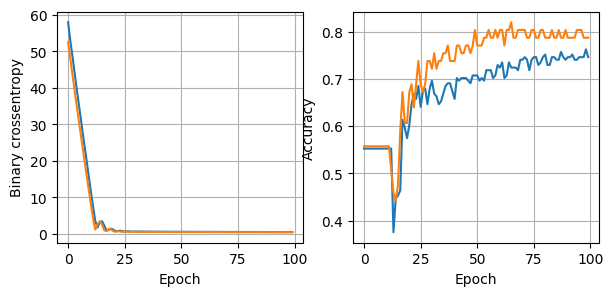

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7954 - loss: 0.4925 
16 nodes, 0 dropout prob, 0.001 learning rate, 128 batch size


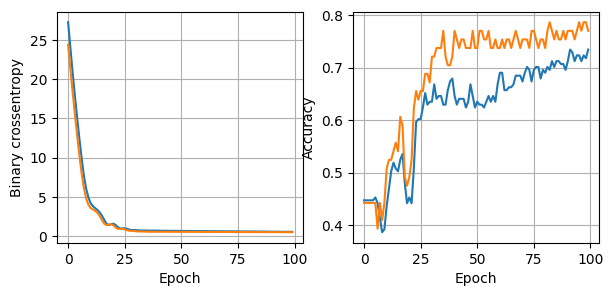

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7741 - loss: 0.4938 
16 nodes, 0 dropout prob, 0.005 learning rate, 32 batch size


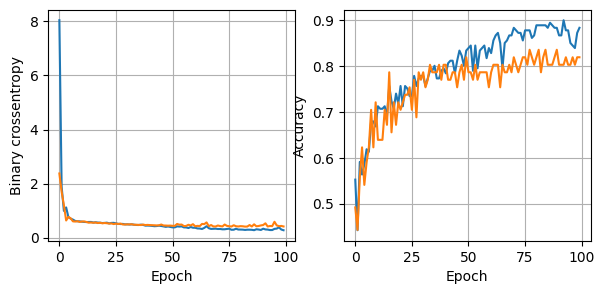

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8277 - loss: 0.4051 
16 nodes, 0 dropout prob, 0.005 learning rate, 64 batch size


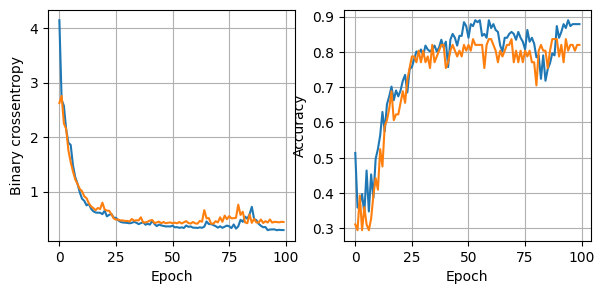

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8381 - loss: 0.4262 
16 nodes, 0 dropout prob, 0.005 learning rate, 128 batch size


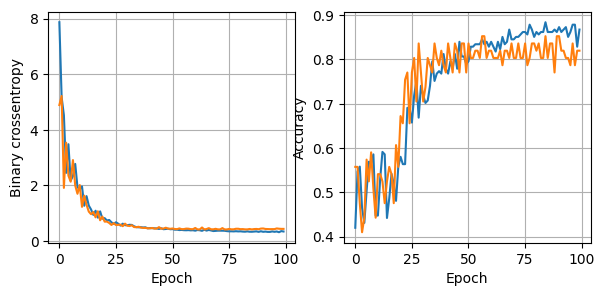

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8381 - loss: 0.4137 
16 nodes, 0 dropout prob, 0.01 learning rate, 32 batch size


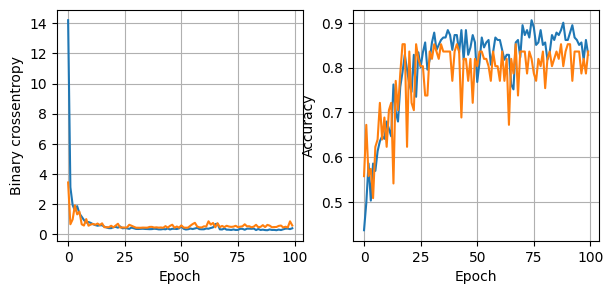

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8595 - loss: 0.5395 
16 nodes, 0 dropout prob, 0.01 learning rate, 64 batch size


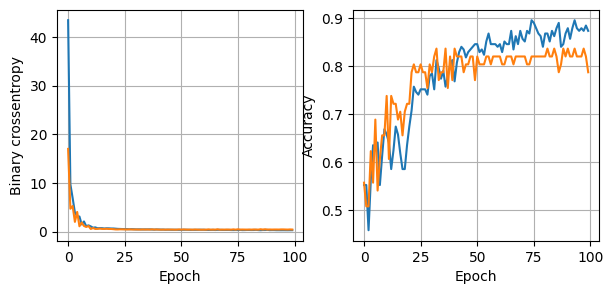

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8058 - loss: 0.4188 
16 nodes, 0 dropout prob, 0.01 learning rate, 128 batch size


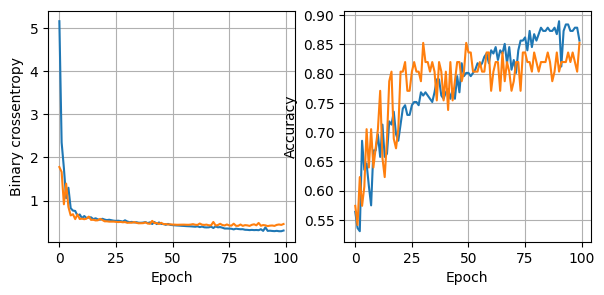

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8704 - loss: 0.4385 
16 nodes, 0.2 dropout prob, 0.001 learning rate, 32 batch size


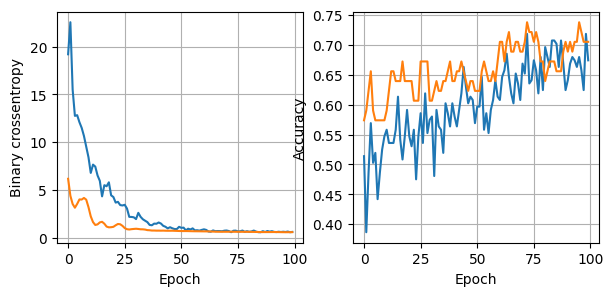

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7095 - loss: 0.5694 
16 nodes, 0.2 dropout prob, 0.001 learning rate, 64 batch size


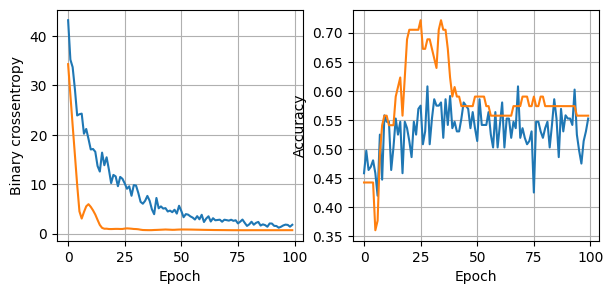

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5487 - loss: 0.6818 
16 nodes, 0.2 dropout prob, 0.001 learning rate, 128 batch size


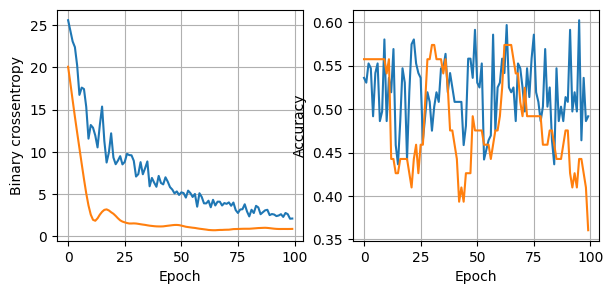

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3550 - loss: 0.8280 
16 nodes, 0.2 dropout prob, 0.005 learning rate, 32 batch size


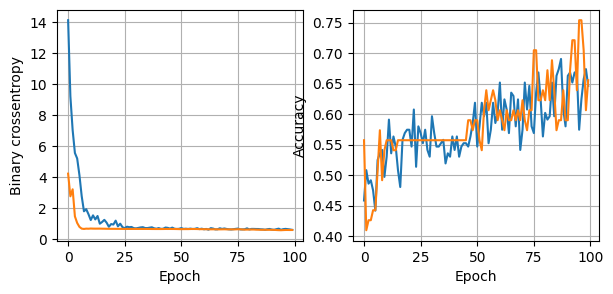

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6559 - loss: 0.6092 
16 nodes, 0.2 dropout prob, 0.005 learning rate, 64 batch size


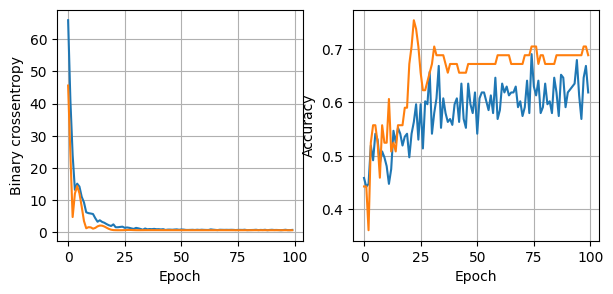

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6882 - loss: 0.6001 
16 nodes, 0.2 dropout prob, 0.005 learning rate, 128 batch size


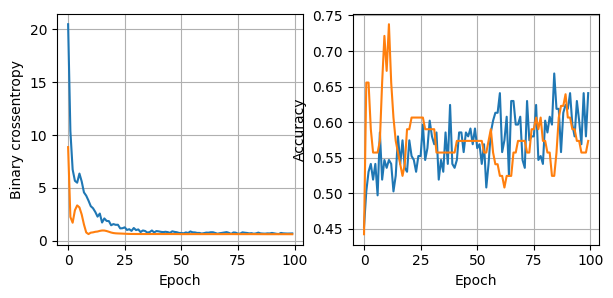

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5700 - loss: 0.6156 
16 nodes, 0.2 dropout prob, 0.01 learning rate, 32 batch size


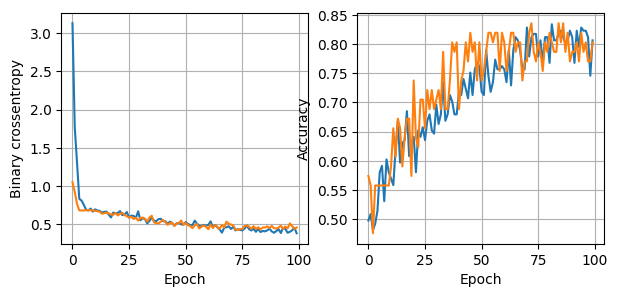

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8272 - loss: 0.4469 
16 nodes, 0.2 dropout prob, 0.01 learning rate, 64 batch size


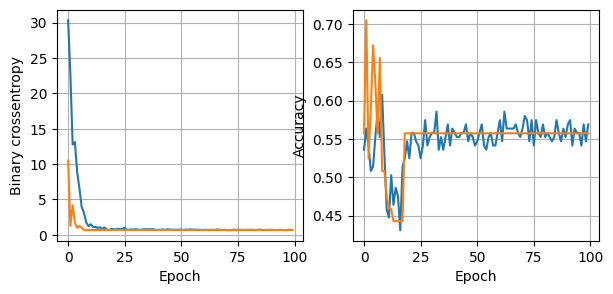

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5487 - loss: 0.6887 
16 nodes, 0.2 dropout prob, 0.01 learning rate, 128 batch size


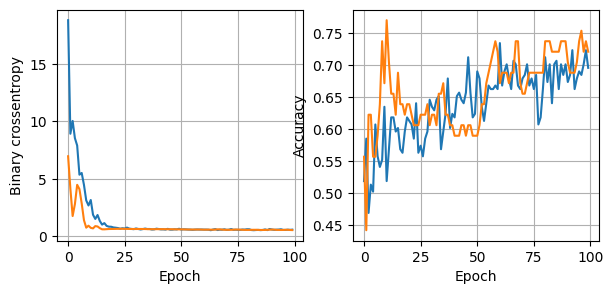

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7205 - loss: 0.5339 
32 nodes, 0 dropout prob, 0.001 learning rate, 32 batch size


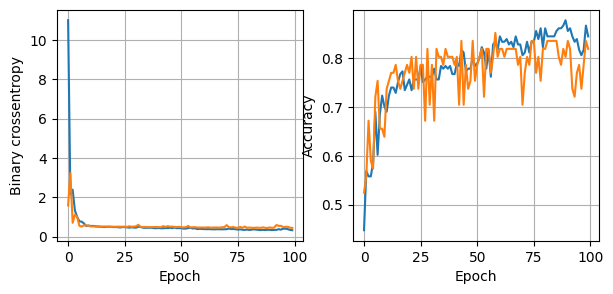

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8277 - loss: 0.4219 
32 nodes, 0 dropout prob, 0.001 learning rate, 64 batch size


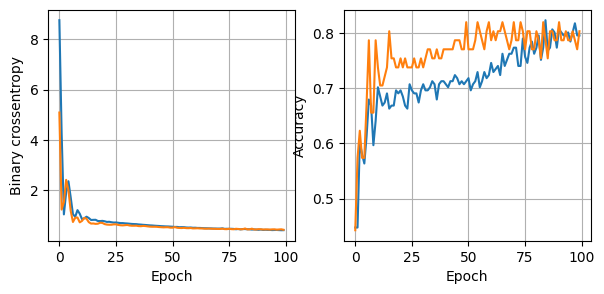

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8168 - loss: 0.4336 
32 nodes, 0 dropout prob, 0.001 learning rate, 128 batch size


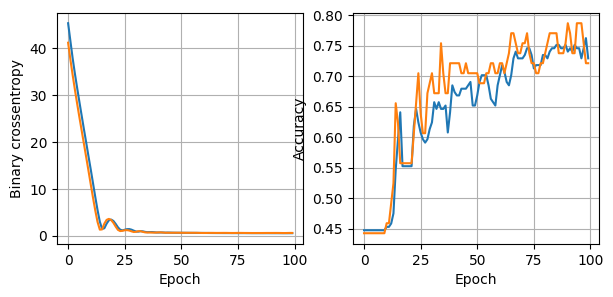

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7205 - loss: 0.5759 
32 nodes, 0 dropout prob, 0.005 learning rate, 32 batch size


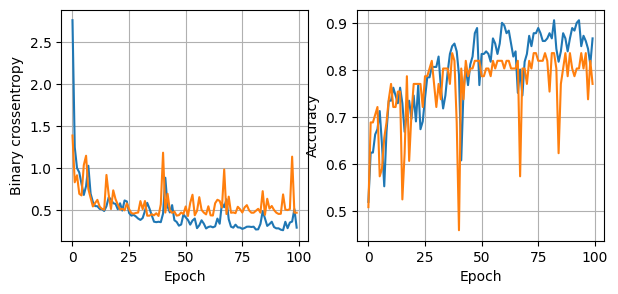

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7741 - loss: 0.4646 
32 nodes, 0 dropout prob, 0.005 learning rate, 64 batch size


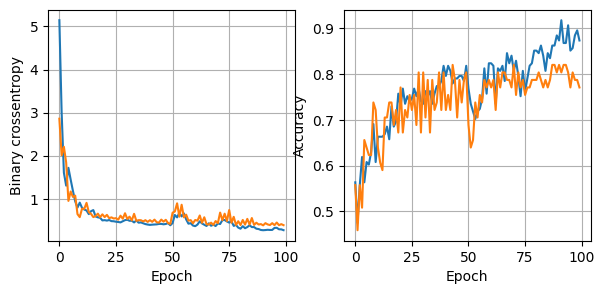

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7845 - loss: 0.3858 
32 nodes, 0 dropout prob, 0.005 learning rate, 128 batch size


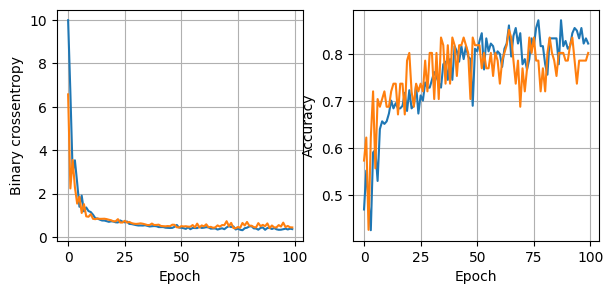

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7959 - loss: 0.4299 
32 nodes, 0 dropout prob, 0.01 learning rate, 32 batch size


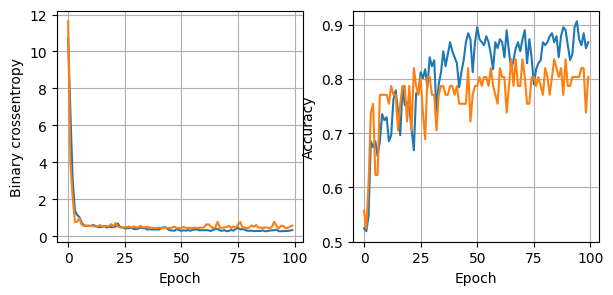

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8168 - loss: 0.5335 
32 nodes, 0 dropout prob, 0.01 learning rate, 64 batch size


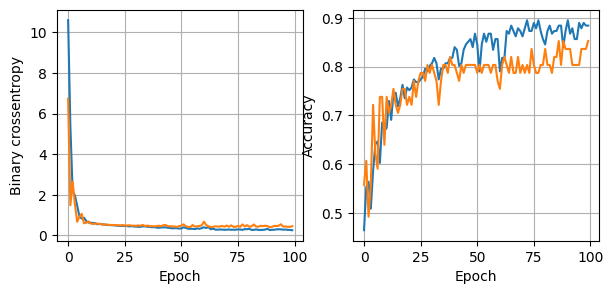

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8704 - loss: 0.4385 
32 nodes, 0 dropout prob, 0.01 learning rate, 128 batch size


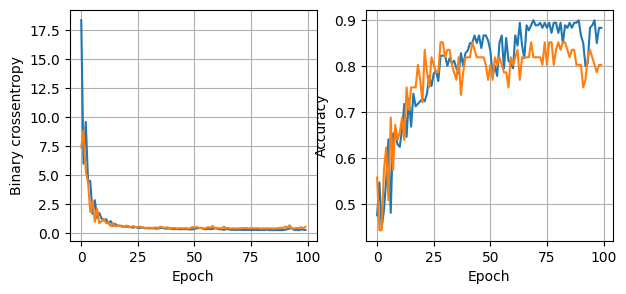

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8168 - loss: 0.5130 
32 nodes, 0.2 dropout prob, 0.001 learning rate, 32 batch size


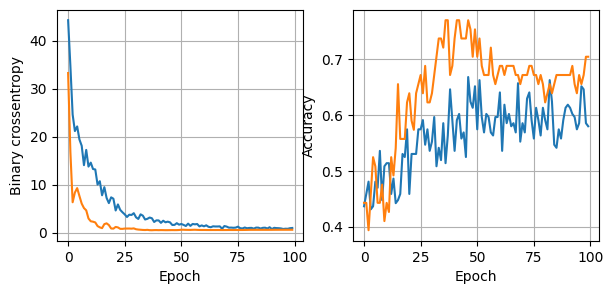

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7095 - loss: 0.6098 
32 nodes, 0.2 dropout prob, 0.001 learning rate, 64 batch size


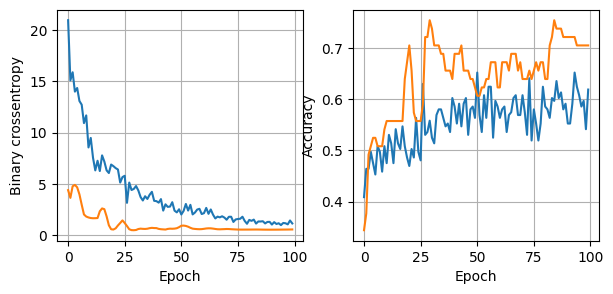

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6991 - loss: 0.5797 
32 nodes, 0.2 dropout prob, 0.001 learning rate, 128 batch size


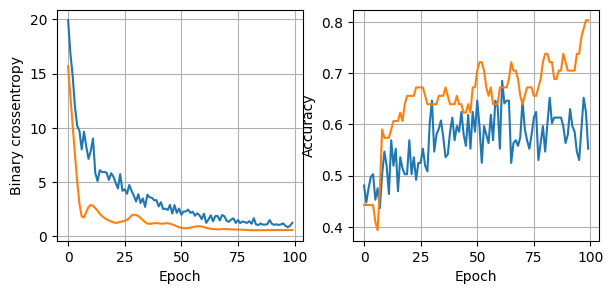

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8168 - loss: 0.5616 
32 nodes, 0.2 dropout prob, 0.005 learning rate, 32 batch size


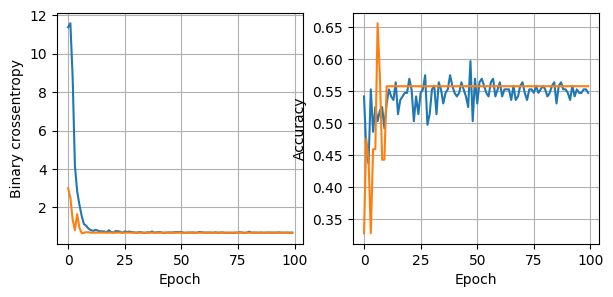

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5487 - loss: 0.6884 
32 nodes, 0.2 dropout prob, 0.005 learning rate, 64 batch size


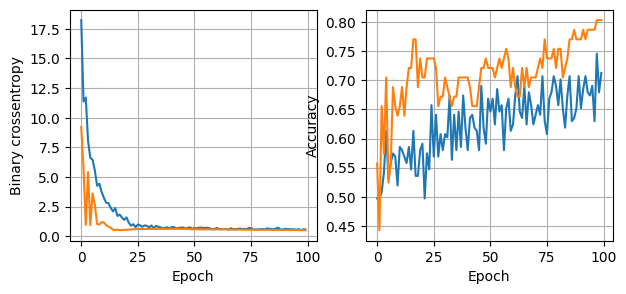

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8064 - loss: 0.5184 
32 nodes, 0.2 dropout prob, 0.005 learning rate, 128 batch size


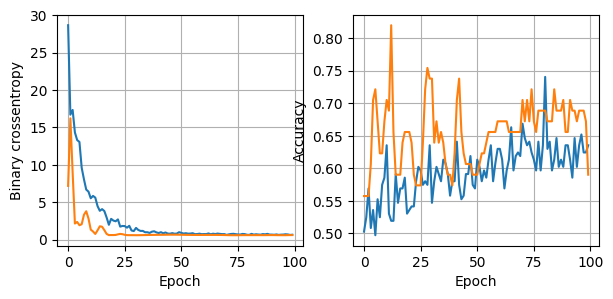

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5601 - loss: 0.6134 
32 nodes, 0.2 dropout prob, 0.01 learning rate, 32 batch size


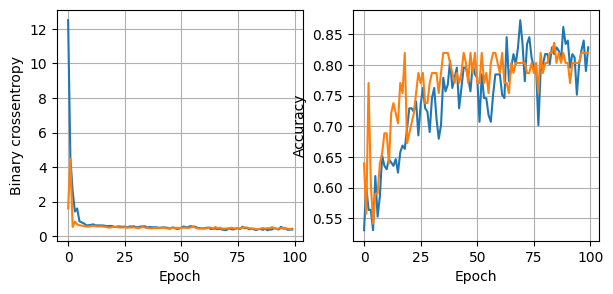

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8381 - loss: 0.4195 
32 nodes, 0.2 dropout prob, 0.01 learning rate, 64 batch size


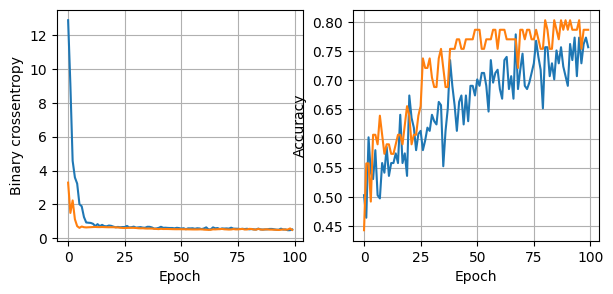

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7954 - loss: 0.4758 
32 nodes, 0.2 dropout prob, 0.01 learning rate, 128 batch size


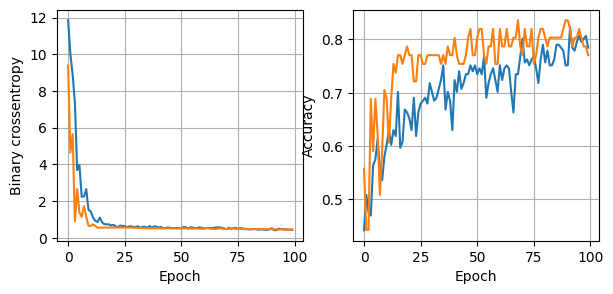

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7845 - loss: 0.4360 
64 nodes, 0 dropout prob, 0.001 learning rate, 32 batch size


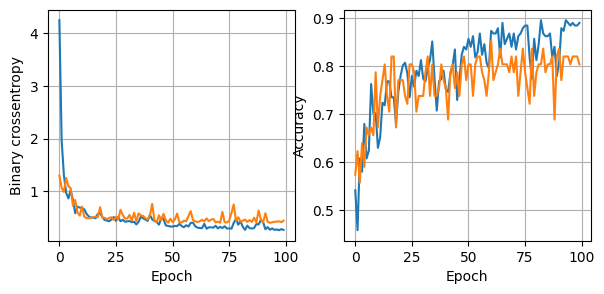

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7959 - loss: 0.4494 
64 nodes, 0 dropout prob, 0.001 learning rate, 64 batch size


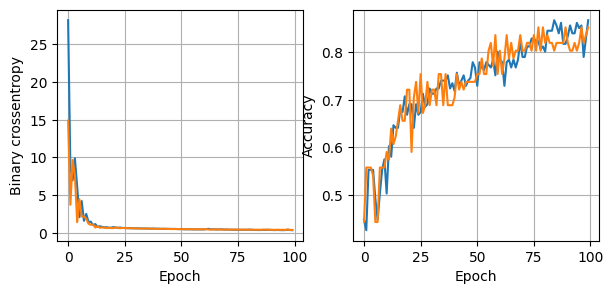

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8704 - loss: 0.3724 
64 nodes, 0 dropout prob, 0.001 learning rate, 128 batch size


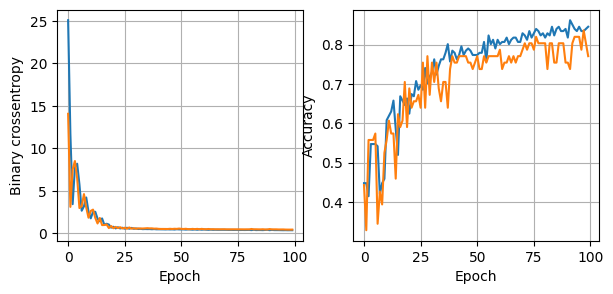

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7845 - loss: 0.4080 
64 nodes, 0 dropout prob, 0.005 learning rate, 32 batch size


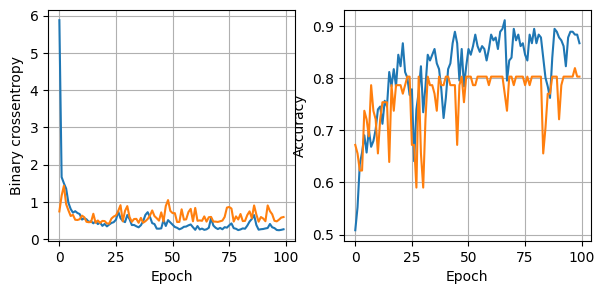

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8168 - loss: 0.5618 
64 nodes, 0 dropout prob, 0.005 learning rate, 64 batch size


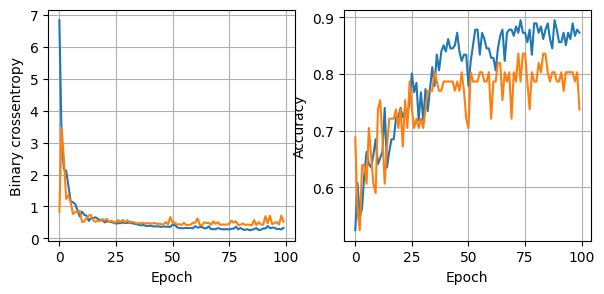

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7314 - loss: 0.5409 
64 nodes, 0 dropout prob, 0.005 learning rate, 128 batch size


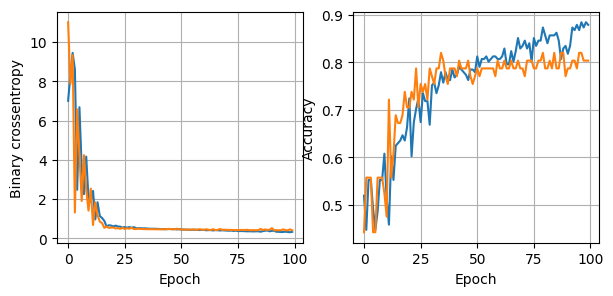

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8168 - loss: 0.3939 
64 nodes, 0 dropout prob, 0.01 learning rate, 32 batch size


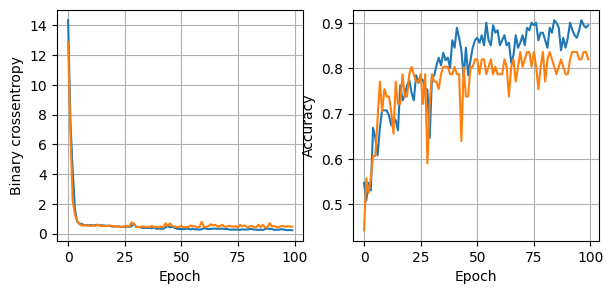

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8381 - loss: 0.4426 
64 nodes, 0 dropout prob, 0.01 learning rate, 64 batch size


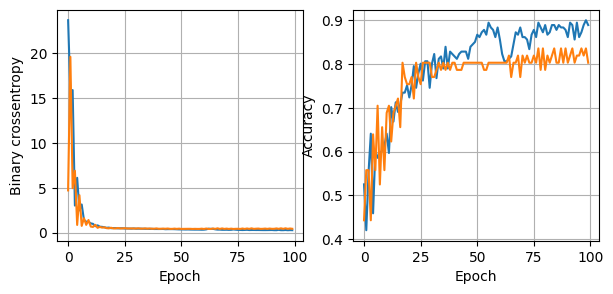

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8272 - loss: 0.4127 
64 nodes, 0 dropout prob, 0.01 learning rate, 128 batch size


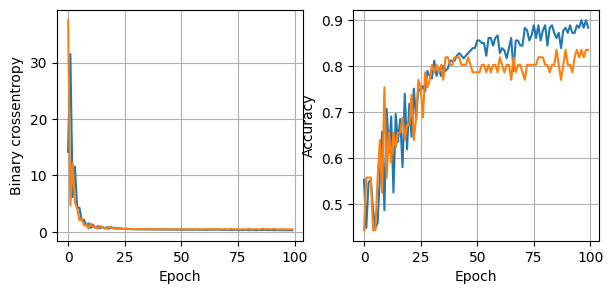

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8595 - loss: 0.4285 
64 nodes, 0.2 dropout prob, 0.001 learning rate, 32 batch size


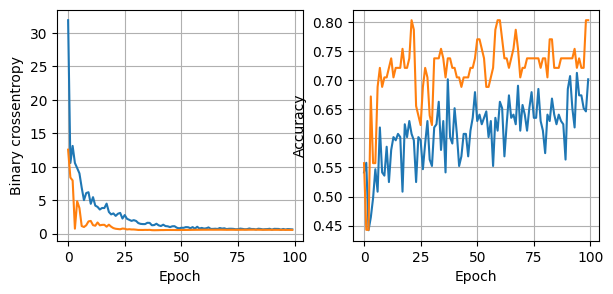

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8168 - loss: 0.5611 
64 nodes, 0.2 dropout prob, 0.001 learning rate, 64 batch size


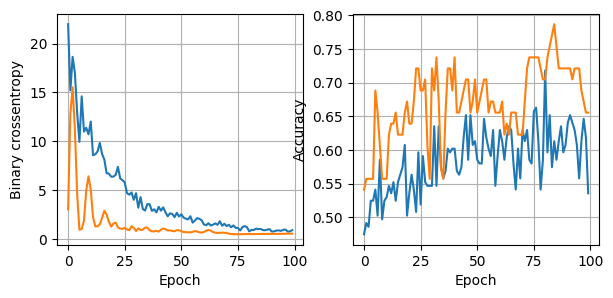

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6455 - loss: 0.5912 
64 nodes, 0.2 dropout prob, 0.001 learning rate, 128 batch size


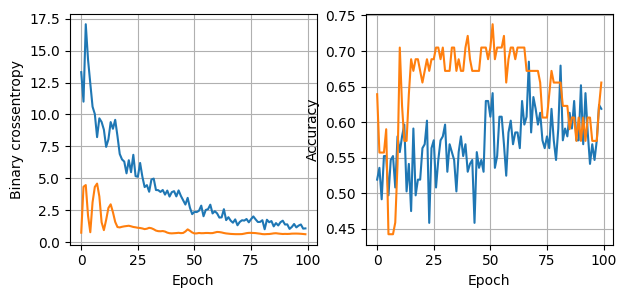

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6767 - loss: 0.6121 
64 nodes, 0.2 dropout prob, 0.005 learning rate, 32 batch size


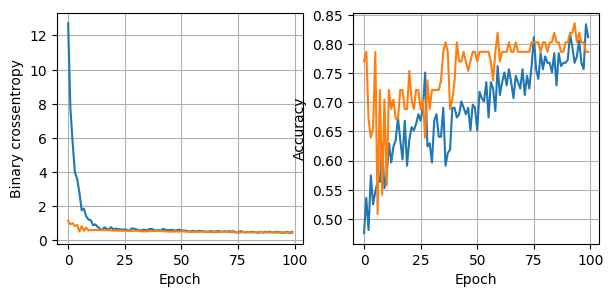

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7954 - loss: 0.4381 
64 nodes, 0.2 dropout prob, 0.005 learning rate, 64 batch size


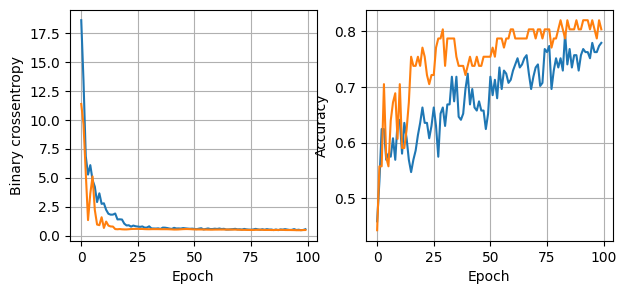

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8168 - loss: 0.4656 
64 nodes, 0.2 dropout prob, 0.005 learning rate, 128 batch size


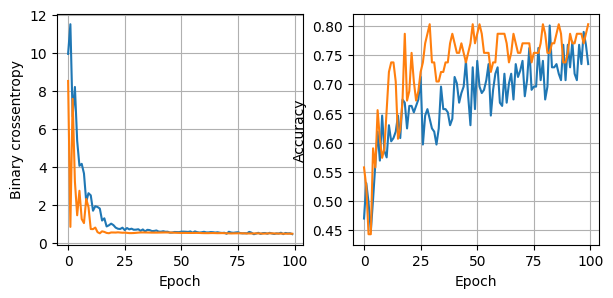

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8064 - loss: 0.4845 
64 nodes, 0.2 dropout prob, 0.01 learning rate, 32 batch size


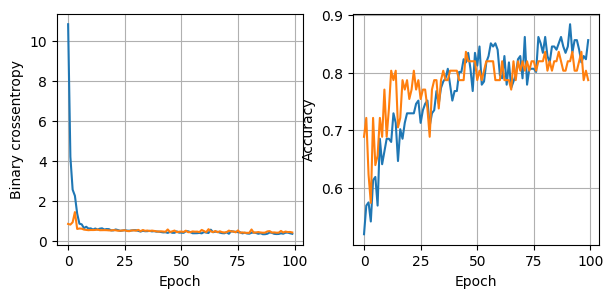

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7850 - loss: 0.4102 
64 nodes, 0.2 dropout prob, 0.01 learning rate, 64 batch size


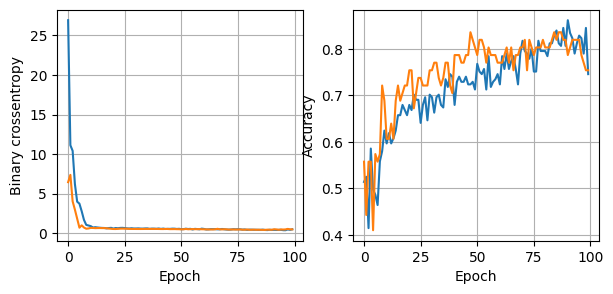

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7527 - loss: 0.4638 
64 nodes, 0.2 dropout prob, 0.01 learning rate, 128 batch size


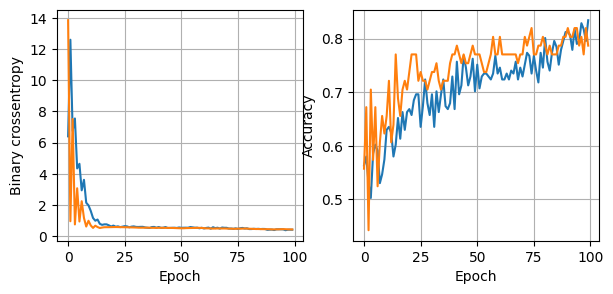

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7954 - loss: 0.4260 


In [21]:
# Test to find the best neural network
least_val_loss = float('inf')
least_loss_model = None

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.001, 0.005, 0.01]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, {dropout_prob} dropout prob, {lr} learning rate, {batch_size} batch size")
                nn_model, history = train_nn_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size)
                
                plot_history(history)
                val_loss = nn_model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = nn_model

In [22]:
# Evaluate performance
nn_preds = least_loss_model.predict(X_test)
nn_preds = (nn_preds > 0.5).astype(int)  # Convert probabilities to class labels

print(classification_report(y_test, nn_preds))
MAE_nn = mean_absolute_error(y_test, nn_preds)
print(f"Mean absolute error: {round(MAE_nn, 5)}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
              precision    recall  f1-score   support

           0       0.76      0.43      0.55        30
           1       0.61      0.87      0.72        31

    accuracy                           0.66        61
   macro avg       0.69      0.65      0.64        61
weighted avg       0.69      0.66      0.64        61

Mean absolute error: 0.34426


# Conclusion
The model with the lowest MAE and highest accuracy is tied at Naive Bayes and Neural Networks

In [23]:
def print_evaluation(model, MAE, preds):
    accuracy = round(classification_report(y_test, preds, output_dict=True)['accuracy'], 5)
    print(f"{model}:\n{round(MAE, 5)} MAE\t{accuracy} accuracy")

print_evaluation("KNN", MAE_KNN, KNN_preds)
print("\n")
print_evaluation("Naive Bayes", MAE_bayes, bayes_preds)
print("\n")
print_evaluation("Logistic Regression", MAE_log_reg, log_reg_preds)
print("\n")
print_evaluation("SVM", MAE_SVM, best_SVM_preds)
print("\n")
print_evaluation("Neural Networks", MAE_nn, nn_preds)

KNN:
0.4918 MAE	0.5082 accuracy


Naive Bayes:
0.27869 MAE	0.72131 accuracy


Logistic Regression:
0.31148 MAE	0.68852 accuracy


SVM:
0.4918 MAE	0.67213 accuracy


Neural Networks:
0.34426 MAE	0.65574 accuracy
